# Perceptron Model

* The Perceptron is a linear classifier that predicts based on a weighted sum of
input features. 
* It updates weights using the formula: 𝑤𝑖 = 𝑤𝑖 + η⋅(𝑦 − 𝑦^)⋅𝑥𝑖

* where 𝑤i is the weight, η is the learning rate, y is the true label, 𝑦^ is the predicted and 𝑥i is the input feature



### load dataset: 
   * dataset details at https://archive.ics.uci.edu/ml/datasets/iris

## Part A: Implementation of the Perceptron Model

### import tools

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

<div style="text-align: center;">
<img src="./images/Iris dataset.png" alt="IrisData" width="700">

In [31]:
# load dataset
df = pd.read_csv('data/iris.data.csv')

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Convert non-numeric data, for numpy processing

In [32]:
targets = set(df['variety'].to_list())

targets

{'Setosa', 'Versicolor', 'Virginica'}

#### Create Two DataFrames by removing Virginica and Setosa respectively

In [33]:
virginica_indices = df[df['variety'] == 'Virginica'].index
setosa_indices = df[df['variety'] == 'Setosa'].index

df1 = df.drop(virginica_indices);
df2 = df.drop(setosa_indices);

targets = set(df1['variety'].to_list())
print(targets)
idx = {}
for i, target in enumerate(targets):
    idx[target] = i

print(idx)

targets2 = set(df2['variety'].to_list())
print(targets2)
idx2 = {}
for i, target in enumerate(targets2):
    idx2[target] = i

print(idx2)

{'Versicolor', 'Setosa'}
{'Versicolor': 0, 'Setosa': 1}
{'Versicolor', 'Virginica'}
{'Versicolor': 0, 'Virginica': 1}


### check DataFrame for Setosa + Versicolor

In [34]:
df1['variety'] = [idx[x] for x in df1['variety']]
df1.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [35]:
def plot_iris(feature, feature2):
    plt.figure(figsize=(4, 4))

    for species in df['variety'].unique():
        species_data = df[df['variety'] == species]
        plt.scatter(species_data[feature], species_data[feature2], label=species)

    plt.xlabel(feature +'(cm)')
    plt.ylabel(feature2 +'(cm)')
    plt.title(feature +' vs '+ feature2)
    plt.legend()
    plt.show()

### Plot Iris Data for sepal and petal width

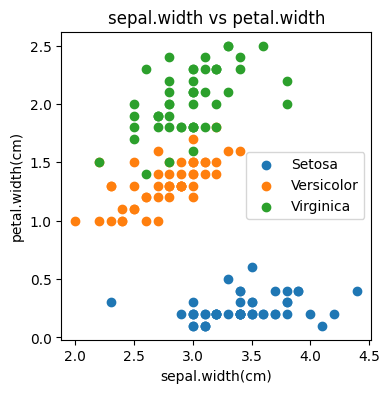

In [36]:
plot_iris('sepal.width','petal.width')

### Plot Iris Data for Sepal and Petal length

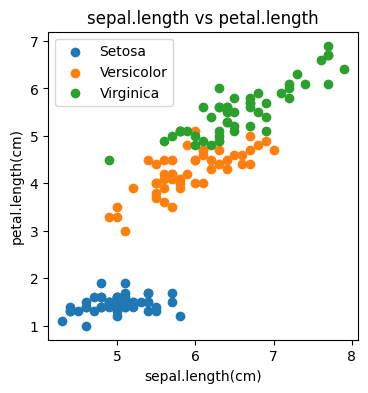

In [37]:
plot_iris('sepal.length','petal.length')

### Plot Iris Data for Sepal width and Petal length

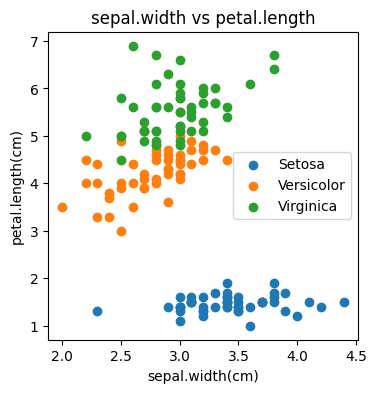

In [38]:
plot_iris('sepal.width','petal.length')

### Plot Iris Data for Sepal length and Petal width

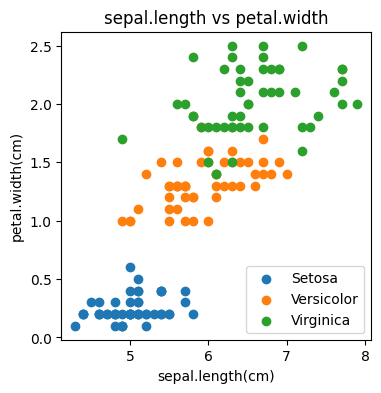

In [39]:
plot_iris('sepal.length','petal.width')

### check DataFrame2 for Virginica + Versicolor

In [40]:
df2['variety'] = [idx2[x] for x in df2['variety']]
df2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


### Remove Petal and Sepal width columns

#### Remove Petal & Sepal Width from DF1 - Setosa + Versicolor

In [41]:
df1 = df1.drop('sepal.width', axis=1)
df1 = df1.drop('petal.width', axis=1)
df1.head()


,sepal.length,petal.length,variety
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


#### Remove Petal & Sepal Width from DF2 - Virginica + Versicolor

In [42]:

df2 = df2.drop('sepal.width', axis=1)
df2 = df2.drop('petal.width', axis=1)
df2.head()

,sepal.length,petal.length,variety
50,7.0,4.7,0
51,6.4,4.5,0
52,6.9,4.9,0
53,5.5,4.0,0
54,6.5,4.6,0


## Visualise Data

### Define Perceptron Classifier

### Define Model

In [43]:
import time

class Perceptron():
    def __init__(self, learning_rate=0.01, epochs=100, random_state=41):
        ''' constructor '''
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.weights = None
        self.bias = None
        self.errors= []
        self.accuracy= []
        self.training_time = None


In [44]:
def fit(self, X, y):
    ''' function to train the perceptron model '''
    tic = time.time()
    samples_n, features_n = X.shape
    self.weights = np.zeros(features_n)
    self.bias = 0

    for epoch in range(self.epochs):
        errors = 0
        for xi, target in zip(X, y):
            z = sum(xi[i] * self.weights[i] for i in range(len(xi))) + self.bias
            y_hat = 1 if z >= 0 else 0
            change = self.learning_rate * (target - y_hat)
           
            self.weights += change * xi
            self.bias += change

            if target != y_hat: 
                errors += 1

        #Update stats
        accuracy = (len(X) - errors) / len(X)
        self.errors.append(errors)
        self.accuracy.append(accuracy)
    toc = time.time()
    self.training_time = 1000*(toc-tic)
    return self

Perceptron.fit = fit

In [45]:
def predict(self, X):
    ''' function to predict new dataset '''
    z = np.dot(X, self.weights) + self.bias
    #z = [sum(X[i][j] * self.weights[j] for j in range(len(self.weights))) + self.bias for i in range(len(X))]
    preditions = np.where(z >= 0, 1, 0)
    return preditions

Perceptron.predict = predict

In [46]:
def plot_decision_boundary(self, X_train, X_test, y_train, y_test):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)  # Filled contours for decision regions
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, label='Training Data', edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Test Data', marker='X', edgecolors='k')

    plt.xlabel('Sepal Length (Standardized)')
    plt.ylabel('Petal Length (Standardized)')
    plt.title('Perceptron Decision Boundary')
    
    plt.legend()
    plt.show()

Perceptron.plot = plot_decision_boundary

In [47]:
def print_stats(self, X_test, y_test, X_train, y_train):
    Y_pred_test = self.predict(X_test) 
    Y_pred_train = self.predict(X_train) 
    print("-----------------------------------------------")
    print("Learning rate is = "+str(self.learning_rate))
    print("Epochs is = "+str(self.epochs))
    print("Training Accuracy = ", accuracy_score(y_train, Y_pred_train)*100)
    print("Test Accuracy = ", accuracy_score(y_test, Y_pred_test)*100)
    print("Weights (W1, W2): "+str(self.weights)+", Bias (B): "+str(self.bias)+", training time ="+ str(self.training_time) +"ms")
    print("-----------------------------------------------")
    print()

Perceptron.print = print_stats

### Split the data in train and test set for fitting and evaluation

In [48]:
import math
# Calculating Mean
def mean_perceptron(numbers):
    return sum(numbers) / float(len(numbers))
 
# Calculating Standard Deviation
def std_dev(numbers):
    avg = mean_perceptron(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1 + 0.01)
    return math.sqrt(variance)

def standardize(X_train, X_test):
    mean = np.array([mean_perceptron(X_train[:, i]) for i in range(X_train.shape[1])])
    std = np.array([std_dev(X_train[:, i]) for i in range(X_train.shape[1])])
    X_train_standardized = (X_train - mean) / std
    X_test_standardized = (X_test - mean) / std
    
    return X_train_standardized, X_test_standardized

In [49]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:, :-1].values
Y = df1.iloc[:, -1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=41)

X2 = df2.iloc[:, :-1].values
Y2 = df2.iloc[:, -1].values.reshape(-1,1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=.2, random_state=41)

# Standardize df1 datasets
X_train, X_test = standardize(X_train, X_test)

# Standardize df2 datasets
X2_train, X2_test = standardize(X2_train, X2_test)

In [50]:
classifier = Perceptron(epochs=500)
classifier.fit(X_train,y_train)
print("Weights (W1, W2): "+str(classifier.weights)+" training time ="+ str(classifier.training_time))
print("Bias (B): "+str(classifier.bias))


classifier2 = Perceptron(epochs=500)
classifier2.fit(X2_train,y2_train)
print("Weights (W1, W2): "+str(classifier2.weights)+" training time ="+ str(classifier2.training_time))
print("Bias (B): "+str(classifier2.bias))


Weights (W1, W2): [-0.00901206 -0.0209743 ] training time =210.62302589416504
Bias (B): [-0.01]
Weights (W1, W2): [-0.02440132  0.04720293] training time =198.23884963989258
Bias (B): [0.]


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron as SkPerceptron 


y_pred_test = classifier.predict(X_test) 
y_pred_train = classifier.predict(X_train) 

#print(sum(classifier.errors))
print("Test Accuracy(Setosa + Versicolor) = ", accuracy_score(y_test, y_pred_test)*100)
print("Train Accuracy(Setosa + Versicolor) = ", accuracy_score(y_train, y_pred_train)*100)

# Built-in Model, fit and accuracy
sklearn_perceptron = SkPerceptron(eta0=0.1, max_iter=500, random_state=42) 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
y_train2 = y_train.ravel()
sklearn_perceptron.fit(X_train_std, y_train2)

ypred = sklearn_perceptron.predict(X_test_std)
print("Sklearn Accuracy (Virginica + Versicolor) = ", accuracy_score(y_test, ypred)*100)

print()
######## 
y2_pred_test = classifier2.predict(X2_test) 
y2_pred_train = classifier2.predict(X2_train) 
#print(sum(classifier2.errors))
print("Test Accuracy (Virginica + Versicolor)= ", accuracy_score(y_test, y2_pred_test)*100)
print("Train Accuracy(Virginica + Versicolor) = ", accuracy_score(y_train, y2_pred_train)*100)

# Built-in Model, fit and accuracy
sklearn_perceptron2 = SkPerceptron(eta0=0.1, max_iter=500, random_state=42) 
scaler.fit(X2_train)
X2_train_std = scaler.transform(X2_train)
X2_test_std = scaler.transform(X2_test)
y2_train2 = y2_train.ravel()
sklearn_perceptron.fit(X2_train_std, y2_train2)
y2pred = sklearn_perceptron.predict(X2_test_std)
print("Sklearn Accuracy (Virginica + Versicolor) = ", accuracy_score(y2_test, y2pred)*100)



Test Accuracy(Setosa + Versicolor) =  100.0
Train Accuracy(Setosa + Versicolor) =  100.0
Sklearn Accuracy (Virginica + Versicolor) =  100.0

Test Accuracy (Virginica + Versicolor)=  10.0
Train Accuracy(Virginica + Versicolor) =  6.25
Sklearn Accuracy (Virginica + Versicolor) =  90.0


### Visualise 

### Boundary for the classifier 1 (Setosa + Versicolor)

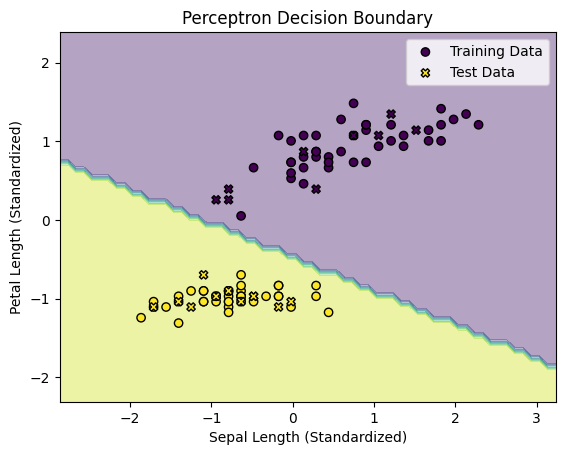

In [52]:
classifier.plot(X_train, X_test, y_train, y_test)

### Boundary for the classifier 2 (Virginica + Versicolor)

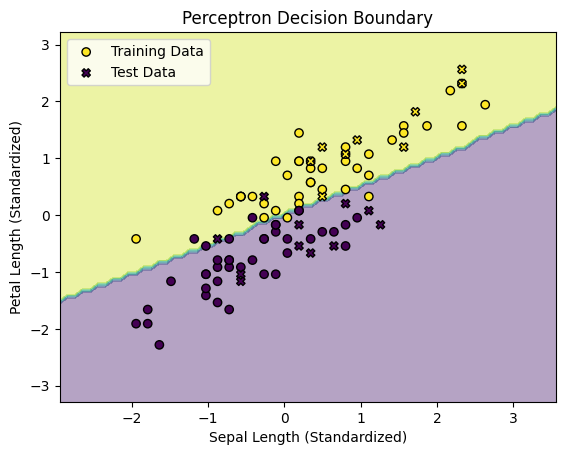

In [53]:
classifier2.plot(X2_train, X2_test, y2_train, y2_test)

## Plot Accuracy

### Accuracy graph of classifier 1 (Setosa + Versicolor)

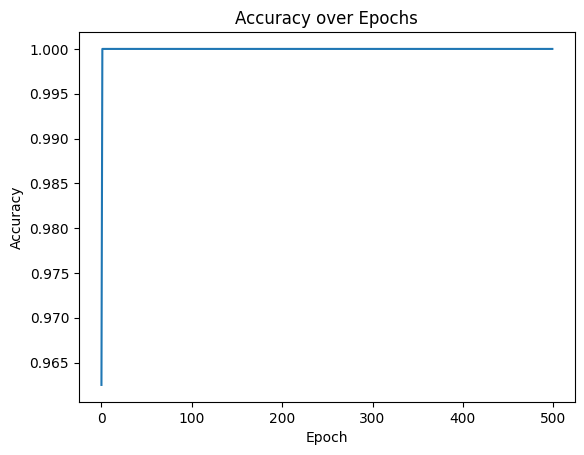

In [54]:
plt.plot(classifier.accuracy)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Accuracy graph of classifier 2 (Virginica + Versicolor)

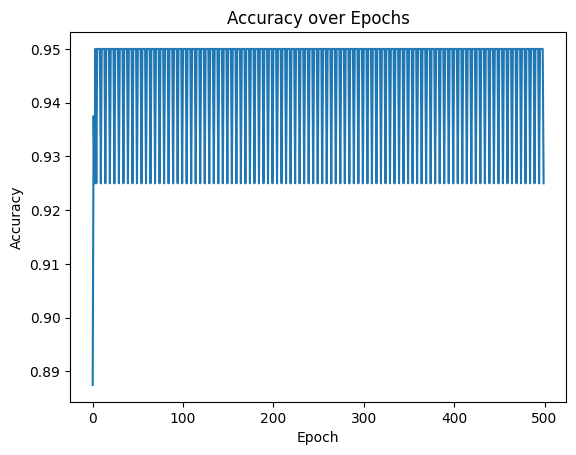

In [55]:
plt.plot(classifier2.accuracy)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Bonus Challenge [Classifier2 ~ (Virginica + Versicolor)]

### Epochs - 100

-----------------------------------------------
Learning rate is = 0.01
Epochs is = 100
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.02440132  0.04720293], Bias (B): [0.], training time =49.87502098083496ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.05
Epochs is = 100
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.12200658  0.23601466], Bias (B): [0.], training time =45.626163482666016ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.001
Epochs is = 100
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.00244013  0.00472029], Bias (B): [0.], training time =44.57902908325195ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.005
Epochs is = 100
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W

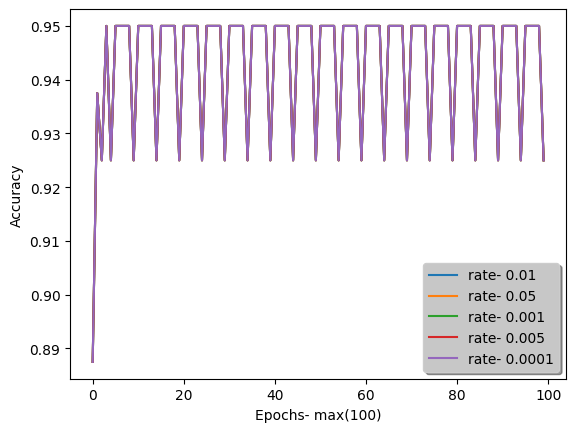

In [56]:
learning_rates = [0.01, 0.05, 0.001, 0.005, 0.0001]
epochs = [ 100, 500, 1000]
for lr in learning_rates:
    model = Perceptron(learning_rate=lr, epochs=100)
    model.fit(X2_train,y2_train)
    model.print(X2_test, y2_test, X2_train, y2_train)
    #if lr == 0.0001:
    plt.plot(np.squeeze(model.accuracy), label= 'rate- '+str(lr))

plt.ylabel('Accuracy')
plt.xlabel('Epochs- max(100)')

legend = plt.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.78')
plt.show()

### Epochs - 500

-----------------------------------------------
Learning rate is = 0.01
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.02440132  0.04720293], Bias (B): [0.], training time =222.35417366027832ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.05
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.12200658  0.23601466], Bias (B): [0.], training time =198.9290714263916ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.001
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.00244013  0.00472029], Bias (B): [0.], training time =224.49088096618652ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.005
Epochs is = 500
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, 

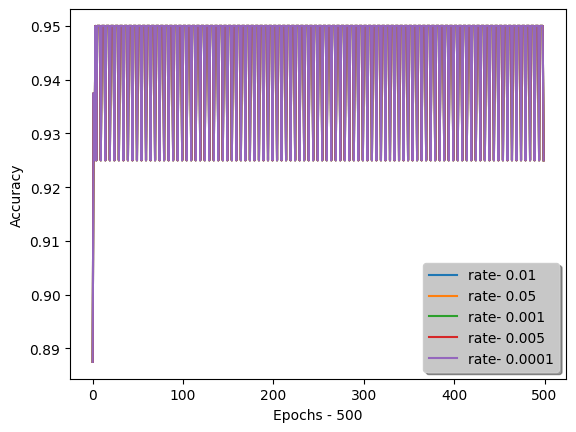

In [57]:
for lr in learning_rates:
    model = Perceptron(learning_rate=lr, epochs=500)
    model.fit(X2_train,y2_train)
    model.print(X2_test, y2_test, X2_train, y2_train)
    plt.plot(np.squeeze(model.accuracy), label= 'rate- '+str(lr))

plt.ylabel('Accuracy')
plt.xlabel('Epochs - 500')

legend = plt.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.78')
plt.show()

### Epochs - 750

-----------------------------------------------
Learning rate is = 0.01
Epochs is = 750
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.02440132  0.04720293], Bias (B): [0.], training time =312.93416023254395ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.05
Epochs is = 750
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.12200658  0.23601466], Bias (B): [0.], training time =317.26717948913574ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.001
Epochs is = 750
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1, W2): [-0.00244013  0.00472029], Bias (B): [0.], training time =340.98100662231445ms
-----------------------------------------------

-----------------------------------------------
Learning rate is = 0.005
Epochs is = 750
Training Accuracy =  93.75
Test Accuracy =  90.0
Weights (W1,

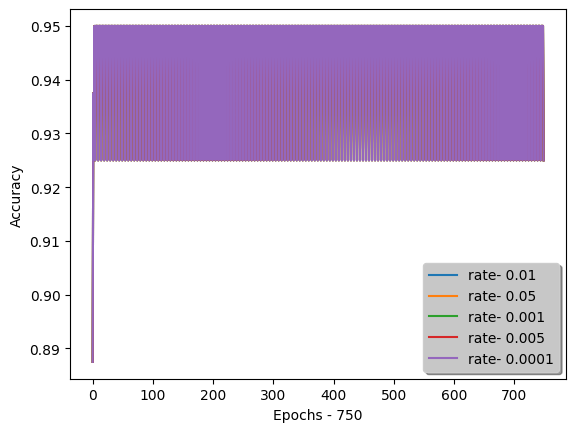

In [58]:

for lr in learning_rates:
    model = Perceptron(learning_rate=lr, epochs=750)
    model.fit(X2_train,y2_train)
    model.print(X2_test, y2_test, X2_train, y2_train)
    plt.plot(np.squeeze(model.accuracy), label= 'rate- '+str(lr))

plt.ylabel('Accuracy')
plt.xlabel('Epochs - 750')

legend = plt.legend(loc='lower right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.78')
plt.show()